# Problem Statement:

# Import the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the DataSet:

In [2]:
df=pd.read_csv("N:\Datasets\Reg-projects\Health-insurance\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum().sum()

0

In [4]:
print(f"Shape of the DataSet is: {df.shape}")

Shape of the DataSet is: (1338, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preprocessing: 

In [7]:
columns=['sex','smoker','region']

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [8]:
for labales in columns:
    df[labales]=lab.fit_transform(df[labales])

In [9]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


# Explarotary Data Analysis:

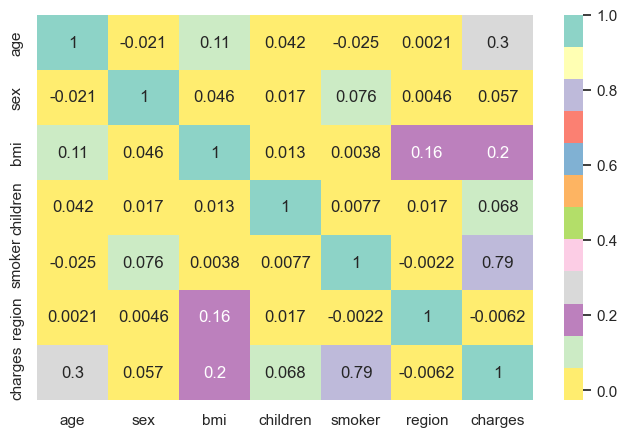

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='Set3_r',)
plt.show()

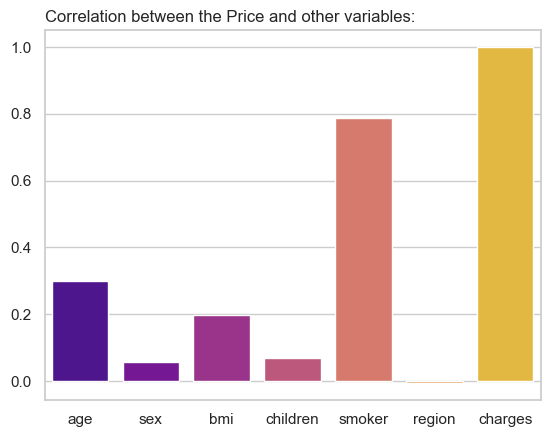

In [11]:
#Correlation between the Price and other variables.
sns.set_style('whitegrid')
plt.title('Correlation between the Price and other variables:',loc='left')
sns.barplot(x=df.corr()['charges'].index,y=df.corr()['charges'].values,palette='plasma')
plt.show()

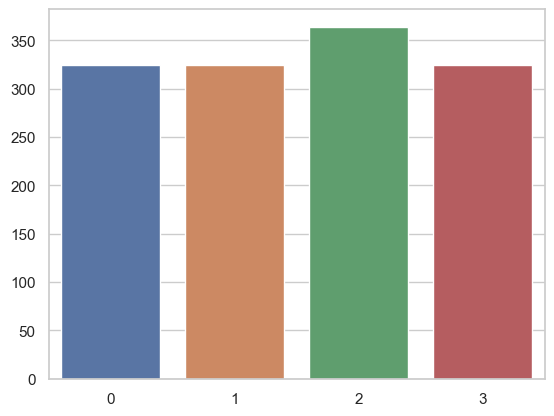

In [12]:
import plotly.express as pl
sns.barplot(x=df['region'].value_counts().index,y=df['region'].value_counts().values)
plt.show()

# Separating the Labels and Features:

In [13]:
X=df.drop('charges',axis=1)
y=df['charges']

In [14]:
X.shape

(1338, 6)

In [15]:
y.shape

(1338,)

# Spliting the DataSet:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
X_train.shape

(1003, 6)

In [19]:
X_test.shape

(335, 6)

In [20]:
y_test.shape

(335,)

In [21]:
y_train.shape

(1003,)

# Model:

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

# Predictions:

In [25]:
predictions=model.predict(X_test)

In [26]:
predictions.shape

(335,)

# Evalution of Model:

In [27]:
model.coef_

array([ 2.50537556e+02,  3.65092141e+00,  3.22881906e+02,  4.50147445e+02,
        2.36021161e+04, -3.41244000e+02])

In [28]:
model.intercept_

-11261.138825163938

In [29]:
#R-squared.
from sklearn.metrics import r2_score
print(100*r2_score(y_test,predictions))

79.62732059725785
